In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

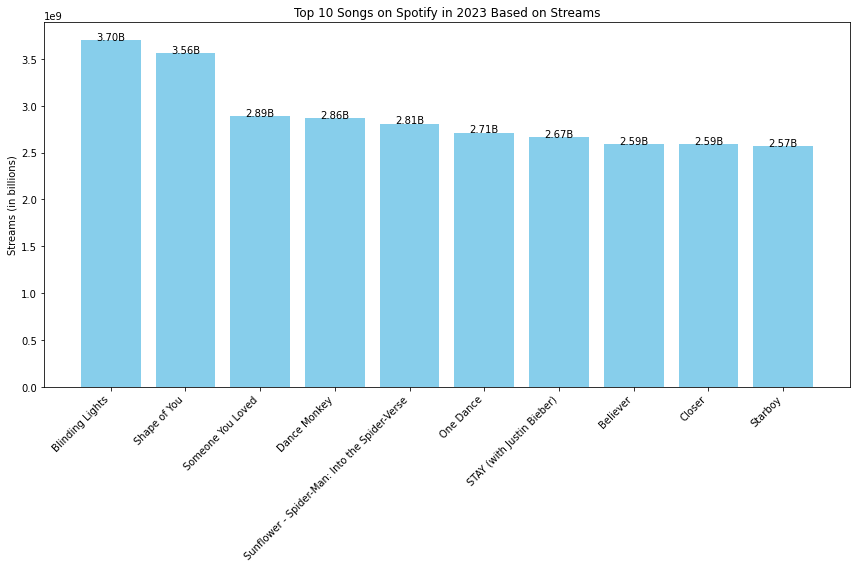

In [25]:
data2 = pd.read_csv('spotify-2023 songs.csv')


data2['streams'] = pd.to_numeric(data2['streams'], errors='coerce')


top_songs = data2[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

# vertical bar graph
plt.figure(figsize=(12, 8))
plt.bar(top_songs['track_name'], top_songs['streams'], color='skyblue')
plt.ylabel('Streams (in billions)')
plt.title('Top 10 Songs on Spotify in 2023 Based on Streams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#data labels
for index, value in enumerate(top_songs['streams']):
    plt.text(index, value, f'{value/1e9:.2f}B', ha='center')


plt.show()

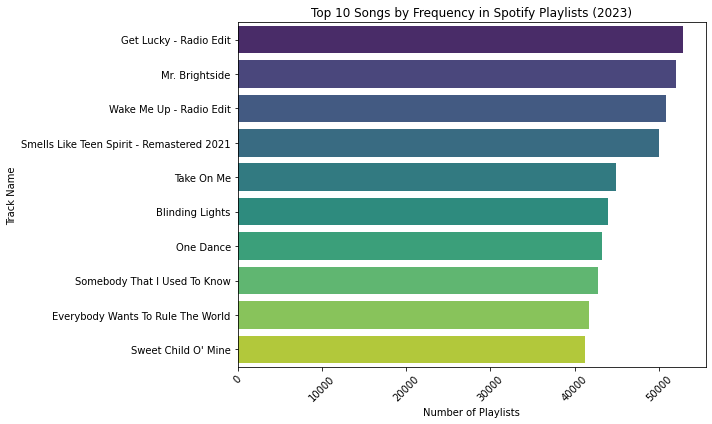

In [17]:
top_songs = data2.nlargest(10, 'in_spotify_playlists')[['track_name', 'artist(s)_name', 'in_spotify_playlists']]

plt.figure(figsize=(10, 6))
sns.barplot(x='in_spotify_playlists', y='track_name', data=top_songs, palette="viridis")
plt.title('Top 10 Songs by Frequency in Spotify Playlists (2023)')
plt.xlabel('Number of Playlists')
plt.ylabel('Track Name')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

                              track_name                      artist(s)_name  \
0                        I'm Good (Blue)            Bebe Rexha, David Guetta   
1                      Murder In My Mind                            Kordhell   
2  That That (prod. & feat. SUGA of BTS)                           PSY, Suga   
3                  Bombonzinho - Ao Vivo      Israel & Rodolffo, Ana Castela   
4                        Merry Christmas              Ed Sheeran, Elton John   
5              Every Angel is Terrifying                          The Weeknd   
6                              KICK BACK                       Kenshi Yonezu   
7                                 Freaks                          Surf Curse   
8                               Hype Boy                            NewJeans   
9       Can't Hold Us (feat. Ray Dalton)  Ray Dalton, Ryan Lewis, Macklemore   

   energy_%  
0        97  
1        97  
2        96  
3        95  
4        94  
5        94  
6        94  
7      

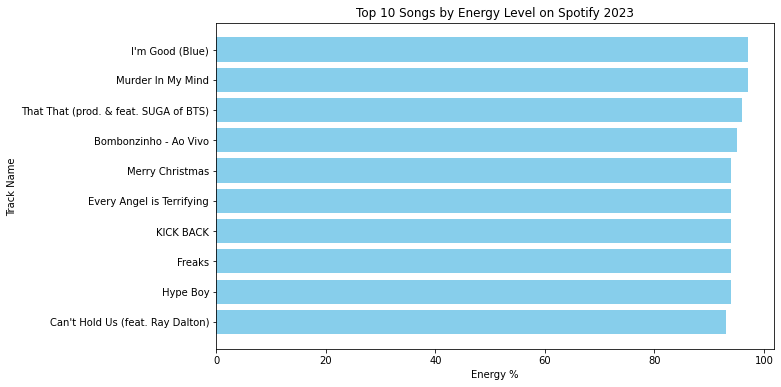

In [16]:
data2 = pd.read_csv('spotify-2023 songs.csv')


top_energy_songs = data2.sort_values(by='energy_%', ascending=False).head(10)


top_energy_songs = top_energy_songs[['track_name', 'artist(s)_name', 'energy_%']]


top_energy_songs.reset_index(drop=True, inplace=True)


next_top_energy_songs = data2.sort_values(by='energy_%', ascending=False).iloc[10:12]


top_energy_songs_updated = top_energy_songs.drop([3, 7]).append(next_top_energy_songs[['track_name', 'artist(s)_name', 'energy_%']], ignore_index=True)


print(top_energy_songs_updated)

# plotting
plt.figure(figsize=(10, 6))
plt.barh(top_energy_songs_updated['track_name'], top_energy_songs_updated['energy_%'], color='skyblue')
plt.xlabel('Energy %')
plt.ylabel('Track Name')
plt.title('Top 10 Songs by Energy Level on Spotify 2023')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest energy song on top
plt.show()

                                            track_name  \
940                                      Sweet Nothing   
167                                   The Night We Met   
17   What Was I Made For? [From The Motion Picture ...   
575                          LA FAMA (with The Weeknd)   
169                                When I Was Your Man   
858                                         Boyfriends   
587                                      Miserable Man   
128                               lovely - Bonus Track   
652       The Joker And The Queen (feat. Taylor Swift)   
623                                          All of Me   

               artist(s)_name  acousticness_%  
940              Taylor Swift              97  
167                Lord Huron              97  
17              Billie Eilish              96  
575      The Weeknd, ROSALï¿½              95  
169                Bruno Mars              94  
858              Harry Styles              94  
587             David Kus

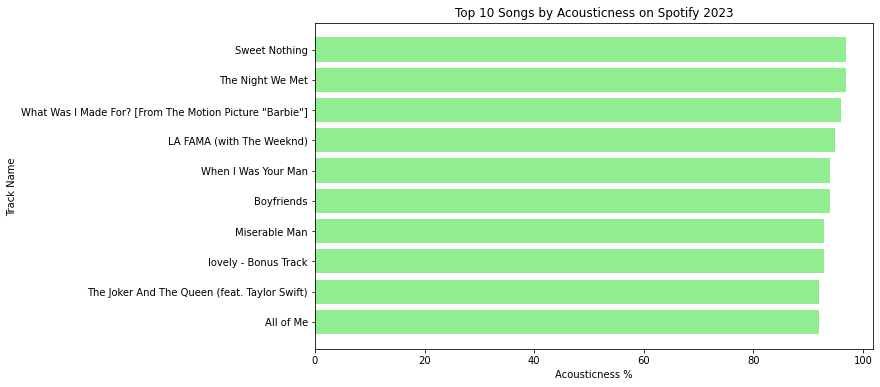

In [15]:
data2 = pd.read_csv('spotify-2023 songs.csv')


top_acoustic_songs = data2.sort_values(by='acousticness_%', ascending=False).head(10)


top_acoustic_songs = top_acoustic_songs[['track_name', 'artist(s)_name', 'acousticness_%']]


print(top_acoustic_songs)

#plotting
plt.figure(figsize=(10, 6))
plt.barh(top_acoustic_songs['track_name'], top_acoustic_songs['acousticness_%'], color='lightgreen')
plt.xlabel('Acousticness %')
plt.ylabel('Track Name')
plt.title('Top 10 Songs by Acousticness on Spotify 2023')
plt.gca().invert_yaxis()  
plt.show()

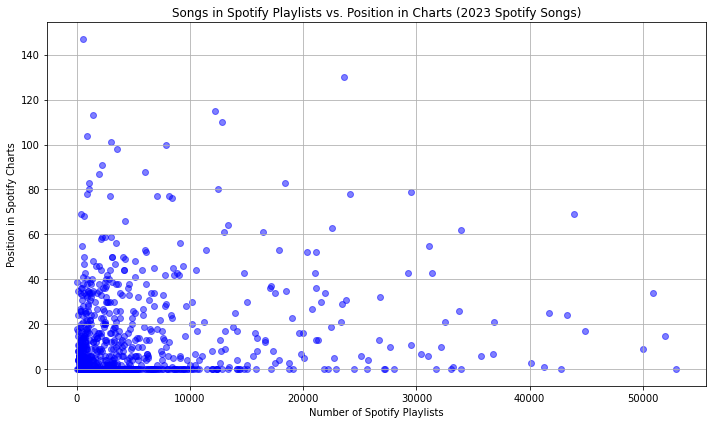

In [20]:

data2 = pd.read_csv('spotify-2023 songs.csv')


spotify_playlists = data2['in_spotify_playlists']
spotify_charts = data2['in_spotify_charts']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(spotify_playlists, spotify_charts, alpha=0.5, color='b')
plt.title('Songs in Spotify Playlists vs. Position in Charts (2023 Spotify Songs)')
plt.xlabel('Number of Spotify Playlists')
plt.ylabel('Position in Spotify Charts')
plt.grid(True)


plt.tight_layout()
plt.show()